In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fast')
Plate1 = pd.read_csv('/content/drive/MyDrive/Master/GenomeEngineering/ResultsPlate1.csv')
Plate2 = pd.read_csv('/content/drive/MyDrive/Master/GenomeEngineering/ResultsPlate2.csv')
images_dir = '/content/drive/MyDrive/Master/GenomeEngineering'

x= np.arange(28, len(Plate2[:25])*10,10)

#Optimization
from scipy.optimize import curve_fit 

#Fitting function
def func(x, a, b):
    return a*x+b
 
# Initial guess for the parameters
initialGuess = [1,1]    

from sklearn.metrics import r2_score

#coefficient_of_dermination = r2_score(y, p(x))

# **2+3**

In [ ]:
R_23

array([0.91828988, 0.90240491, 0.90098163, 0.90094263])

$1. R^{2}$: 0.9182898779200082
$2. R^{2}$: 0.9024049062833748
$4. R^{2}$: 0.0371900826444902
$5. R^{2}$: 0.900942629586743


,L,LA,LAK,LAKA
0,0.366199,0.391669,-0.003668,0.000582
1,0.374714,0.383309,-0.002289,-0.004980
2,0.422303,-0.004909,0.235894,0.355836
3,0.000365,0.000791,0.000369,0.000310
4,0.356784,0.354543,-0.006489,-0.009985


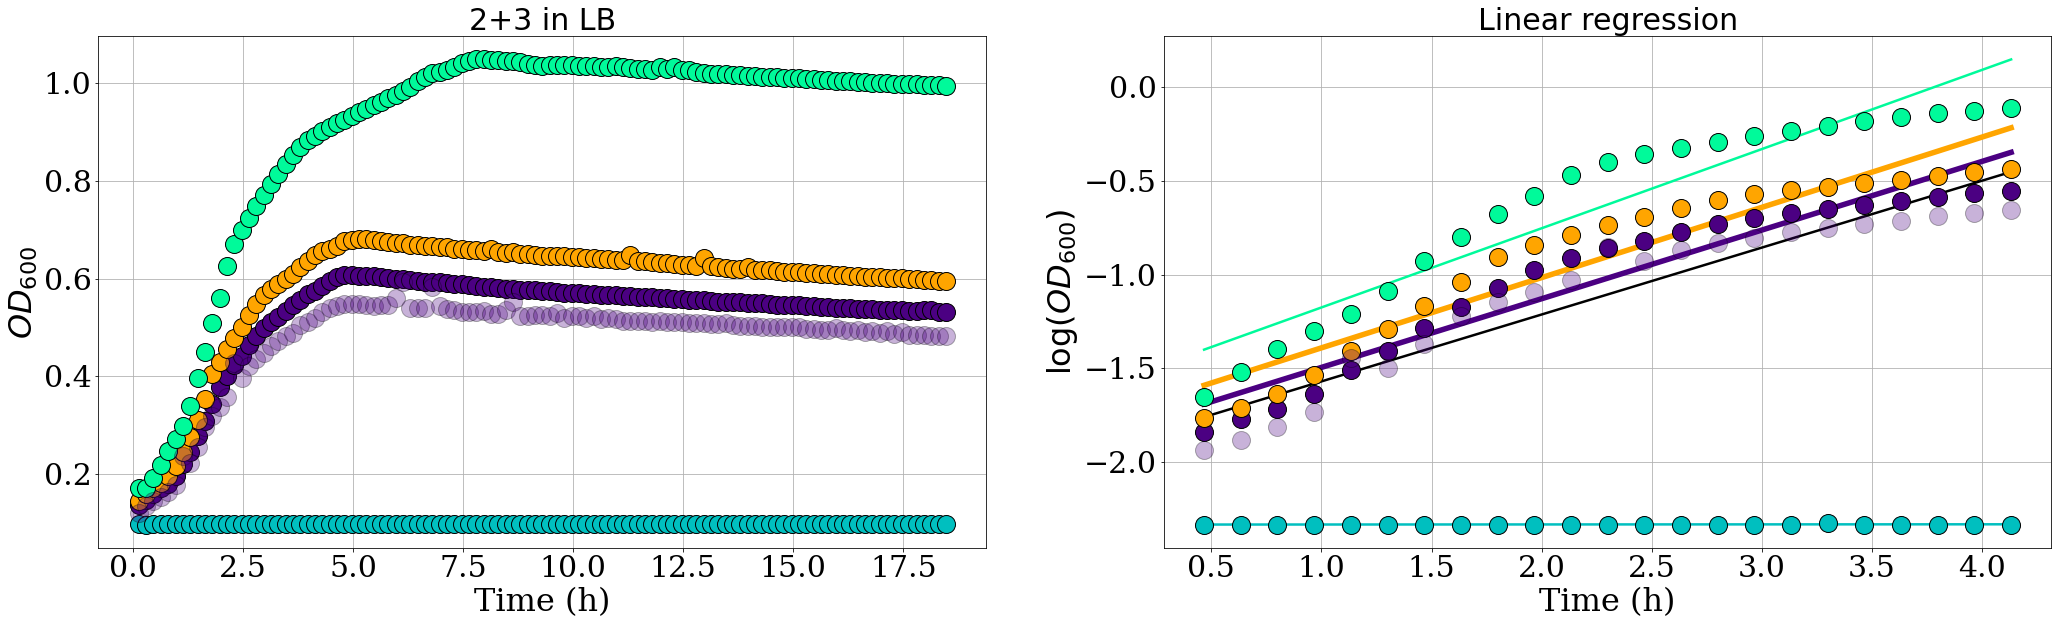

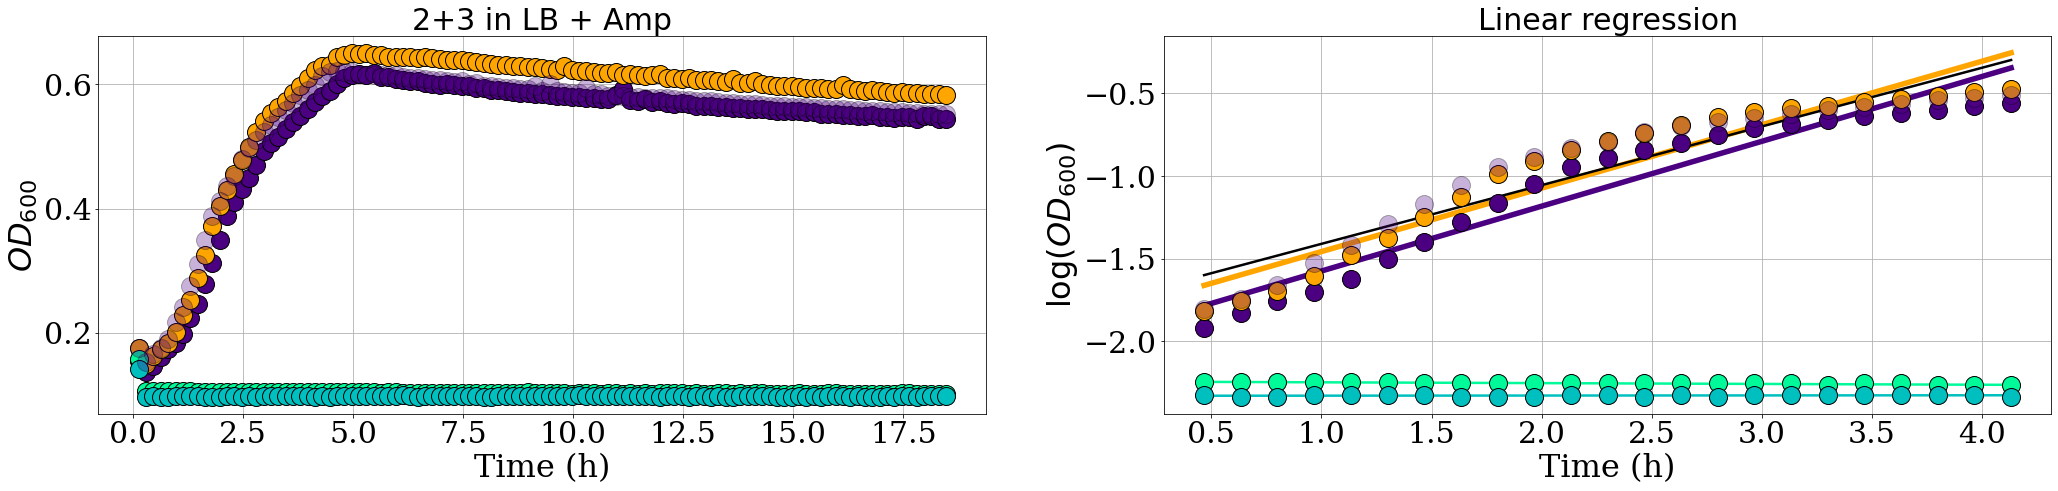

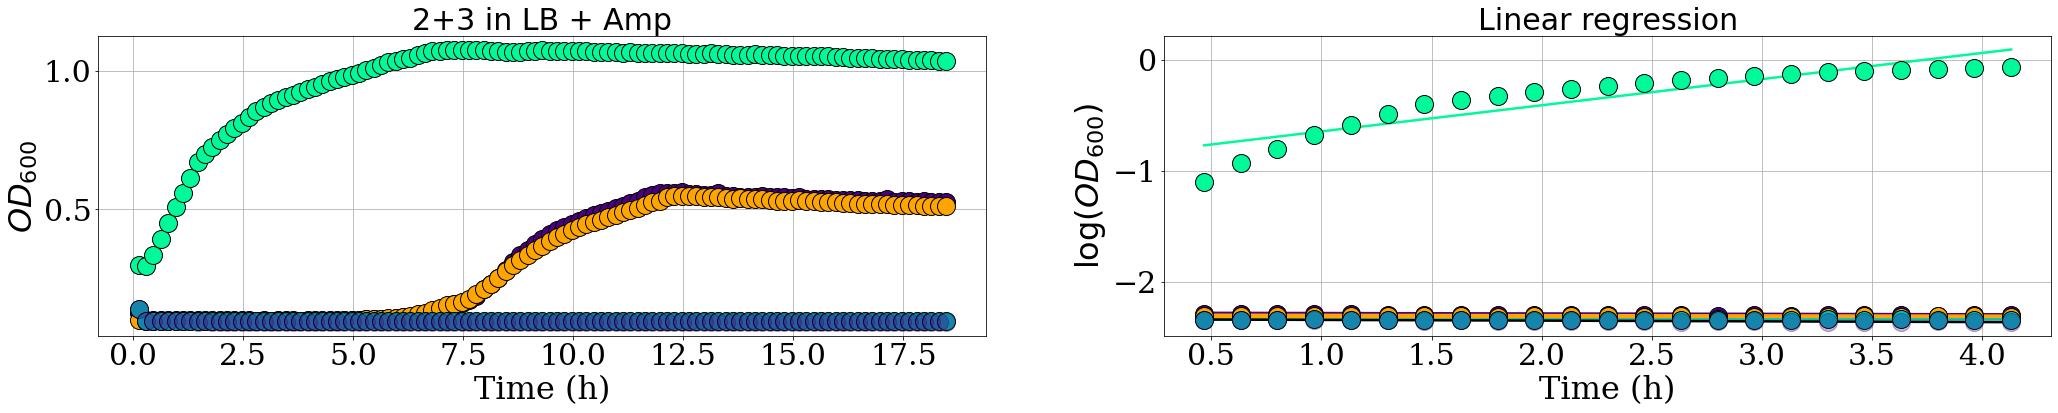

In [ ]:
R_23 = np.array([])
x= np.arange(28, len(Plate2[:25])*10,10)
#LB
Log_data23 = pd.DataFrame()
Log_data23["Log23_A_L"] = np.log(Plate1['B2'][2:25])
Log_data23["Log23_B_L"] = np.log(Plate1['B5'][2:25])
Log_data23["Log23_C_L"] = np.log(Plate1['B7'][2:25])
Log_data23["Log23_D_L"] = np.log(Plate1['B9'][2:25])
Log_data23["Log23_E_L"] = np.log(Plate2['B2'][2:25])

popt1, pcov1 = curve_fit(func, x/60,Log_data23["Log23_A_L"], initialGuess)
R_23 = np.append(R_23, r2_score(Log_data23["Log23_A_L"],func(x/60, *popt1)))
print("$1. R^{2}$: " + str(r2_score(Log_data23["Log23_A_L"],func(x/60, *popt1))))

popt2, pcov2 = curve_fit(func, x/60,Log_data23["Log23_B_L"], initialGuess)
print("$2. R^{2}$: " + str(r2_score(Log_data23["Log23_B_L"],func(x/60, *popt2))))
R_23 = np.append(R_23, r2_score(Log_data23["Log23_B_L"],func(x/60, *popt2)))

popt3, pcov3 = curve_fit(func, x/60,Log_data23["Log23_C_L"], initialGuess)
popt4, pcov4 = curve_fit(func, x/60,Log_data23["Log23_D_L"], initialGuess)
print("$4. R^{2}$: " + str(r2_score(Log_data23["Log23_D_L"],func(x/60, *popt4))))
R_23 = np.append(R_23, r2_score(Log_data23["Log23_C_L"],func(x/60, *popt3)))

popt5, pcov5 = curve_fit(func, x/60,Log_data23["Log23_E_L"], initialGuess)
print("$5. R^{2}$: " + str(r2_score(Log_data23["Log23_E_L"],func(x/60, *popt5))))
R_23 = np.append(R_23, r2_score(Log_data23["Log23_E_L"],func(x/60, *popt5)))

S23_L = np.array([popt1[0],popt2[0],popt3[0],popt4[0],popt5[0]])

x = x= np.arange(8, len(Plate2)*10,10)
fig = plt.figure(figsize=(35,32))
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
plt.rcParams["font.family"] = "serif"
ax1 = plt.subplot(321)
ax1.plot(x/60, Plate1['B2'], ' ',color='k', marker='o', markersize=18,markerfacecolor="indigo")
ax1.plot(x/60, Plate1['B5'], ' ',color='k', marker='o', markersize=18,markerfacecolor="orange")
ax1.plot(x/60, Plate1['B7'], ' ',color='k', marker='o', markersize=18,markerfacecolor="mediumspringgreen")
ax1.plot(x/60, Plate1['B9'], ' ',color='k', marker='o', markersize=18,markerfacecolor="c")
ax1.plot(x/60, Plate2['B2'], ' ',color='k', marker='o', markersize=18,alpha=0.3, markerfacecolor="indigo")
ax1.set_ylabel(r'$OD_{600}$', family="serif",fontsize = 32)
ax1.set_xlabel(r'Time (h)', family="serif",fontsize = 32)
ax1.set_title('2+3 in LB', fontsize = 30, family = 'sarif')
ax1.grid()

x= np.arange(28, len(Plate2[:25])*10,10)
ax2 = plt.subplot(322)
ax2.plot(x/60, func(x/60, *popt1), color='indigo',lw=5.5)
ax2.plot(x/60, func(x/60, *popt2), color='orange',lw=5.5)
ax2.plot(x/60, func(x/60, *popt3), color='mediumspringgreen',lw=2.5)
ax2.plot(x/60, func(x/60, *popt4), color='c',lw=2.5)
ax2.plot(x/60, func(x/60, *popt5), color='k',lw=2.5)
ax2.plot(x/60, Log_data23["Log23_A_L"], ' ',color='k', marker='o', markersize=18,alpha=1,markerfacecolor="indigo")
ax2.plot(x/60, Log_data23["Log23_B_L"], ' ',color='k', marker='o', markersize=18,markerfacecolor="orange")
ax2.plot(x/60, Log_data23["Log23_C_L"], ' ',color='k', marker='o', markersize=18,markerfacecolor="mediumspringgreen")
ax2.plot(x/60, Log_data23["Log23_D_L"], ' ',color='k', marker='o', markersize=18,markerfacecolor="c")
ax2.plot(x/60, Log_data23["Log23_E_L"], ' ',color='k', marker='o', markersize=18,alpha=0.3, markerfacecolor="indigo")
ax2.set_ylabel(r'$\log(OD_{600})$', family="serif", fontsize = 32)
ax2.set_xlabel(r'Time (h)', family="serif",fontsize = 32)
ax2.set_title('Linear regression', fontsize = 30, family = 'sarif')
ax2.grid()


#LB + Amp
Log_data23["Log23_A_LA"] = np.log(Plate1['C2'][2:25])
Log_data23["Log23_B_LA"] = np.log(Plate1['D5'][2:25])
Log_data23["Log23_C_LA"] = np.log(Plate1['D7'][2:25])
Log_data23["Log23_D_LA"] = np.log(Plate1['C9'][2:25])
Log_data23["Log23_E_LA"] = np.log(Plate2['C2'][2:25])
popt1, pcov1 = curve_fit(func, x/60,Log_data23["Log23_A_LA"], initialGuess)
popt2, pcov2 = curve_fit(func, x/60,Log_data23["Log23_B_LA"], initialGuess)
popt3, pcov3 = curve_fit(func, x/60,Log_data23["Log23_C_LA"], initialGuess)
popt4, pcov4 = curve_fit(func, x/60,Log_data23["Log23_D_LA"], initialGuess)
popt5, pcov5 = curve_fit(func, x/60,Log_data23["Log23_E_LA"], initialGuess)
S23_LA = np.array([popt1[0],popt2[0],popt3[0],popt4[0],popt5[0]])

x = x= np.arange(8, len(Plate2)*10,10)
fig = plt.figure(figsize=(35,32))
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
plt.rcParams["font.family"] = "serif"
ax1 = plt.subplot(421)
ax1.plot(x/60, Plate1['C2'], ' ',color='k', marker='o', markersize=18,markerfacecolor="indigo")
ax1.plot(x/60, Plate1['D5'], ' ',color='k', marker='o', markersize=18,markerfacecolor="orange")
ax1.plot(x/60, Plate1['D7'], ' ',color='k', marker='o', markersize=18,markerfacecolor="mediumspringgreen")
ax1.plot(x/60, Plate1['C9'], ' ',color='k', marker='o', markersize=18,markerfacecolor="c")
ax1.plot(x/60, Plate2['C2'], ' ',color='k', marker='o', markersize=18,alpha=0.3, markerfacecolor="indigo")
ax1.set_ylabel(r'$OD_{600}$', family="serif",fontsize = 32)
ax1.set_xlabel(r'Time (h)', family="serif",fontsize = 32)
ax1.set_title('2+3 in LB + Amp', fontsize = 30, family = 'sarif')
ax1.grid()

x= np.arange(28, len(Plate2[:25])*10,10)
ax2 = plt.subplot(422)
ax2.plot(x/60, func(x/60, *popt1), color='indigo',lw=5.5)
ax2.plot(x/60, func(x/60, *popt2), color='orange',lw=5.5)
ax2.plot(x/60, func(x/60, *popt3), color='mediumspringgreen',lw=2.5)
ax2.plot(x/60, func(x/60, *popt4), color='c',lw=2.5)
ax2.plot(x/60, func(x/60, *popt5), color='k',lw=2.5)
ax2.plot(x/60, Log_data23["Log23_A_LA"], ' ',color='k', marker='o', markersize=18,alpha=1,markerfacecolor="indigo")
ax2.plot(x/60, Log_data23["Log23_B_LA"], ' ',color='k', marker='o', markersize=18,markerfacecolor="orange")
ax2.plot(x/60, Log_data23["Log23_C_LA"], ' ',color='k', marker='o', markersize=18,markerfacecolor="mediumspringgreen")
ax2.plot(x/60, Log_data23["Log23_D_LA"], ' ',color='k', marker='o', markersize=18,markerfacecolor="c")
ax2.plot(x/60, Log_data23["Log23_E_LA"], ' ',color='k', marker='o', markersize=18,alpha=0.3, markerfacecolor="indigo")
ax2.set_ylabel(r'$\log(OD_{600})$', family="serif", fontsize = 32)
ax2.set_xlabel(r'Time (h)', family="serif",fontsize = 32)
ax2.set_title('Linear regression', fontsize = 30, family = 'sarif')
ax2.grid()

#LB + Amp + Kan
Log_data23["Log23_A_LAK"] = np.log(Plate1['D2'][2:25])
Log_data23["Log23_B_LAK"] = np.log(Plate1['B6'][2:25])
Log_data23["Log23_C_LAK"] = np.log(Plate1['B8'][2:25])
Log_data23["Log23_D_LAK"] = np.log(Plate1['D9'][2:25])
Log_data23["Log23_E_LAK"] = np.log(Plate2['D2'][2:25])
popt1, pcov1 = curve_fit(func, x/60,Log_data23["Log23_A_LAK"], initialGuess)
popt2, pcov2 = curve_fit(func, x/60,Log_data23["Log23_B_LAK"], initialGuess)
popt3, pcov3 = curve_fit(func, x/60,Log_data23["Log23_C_LAK"], initialGuess)
popt4, pcov4 = curve_fit(func, x/60,Log_data23["Log23_D_LAK"], initialGuess)
popt5, pcov5 = curve_fit(func, x/60,Log_data23["Log23_E_LAK"], initialGuess)
S23_LAK = np.array([popt1[0],popt2[0],popt3[0],popt4[0],popt5[0]])

x = x= np.arange(8, len(Plate2)*10,10)
fig = plt.figure(figsize=(35,32))
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
plt.rcParams["font.family"] = "serif"
ax1 = plt.subplot(521)
ax1.plot(x/60, Plate1['D2'], ' ',color='k', marker='o', markersize=18,markerfacecolor="indigo")
ax1.plot(x/60, Plate1['B6'], ' ',color='k', marker='o', markersize=18,markerfacecolor="orange")
ax1.plot(x/60, Plate1['B8'], ' ',color='k', marker='o', markersize=18,markerfacecolor="mediumspringgreen")
ax1.plot(x/60, Plate1['D9'], ' ',color='k', marker='o', markersize=18,markerfacecolor="c")
ax1.plot(x/60, Plate2['D2'], ' ',color='k', marker='o', markersize=18,alpha=0.3, markerfacecolor="indigo")
ax1.set_ylabel(r'$OD_{600}$', family="serif",fontsize = 32)
ax1.set_xlabel(r'Time (h)', family="serif",fontsize = 32)
ax1.set_title('2+3 in LB + Amp', fontsize = 30, family = 'sarif')
ax1.grid()

x= np.arange(28, len(Plate2[:25])*10,10)
ax2 = plt.subplot(522)
ax2.plot(x/60, func(x/60, *popt1), color='indigo',lw=5.5)
ax2.plot(x/60, func(x/60, *popt2), color='orange',lw=5.5)
ax2.plot(x/60, func(x/60, *popt3), color='mediumspringgreen',lw=2.5)
ax2.plot(x/60, func(x/60, *popt4), color='c',lw=2.5)
ax2.plot(x/60, func(x/60, *popt5), color='k',lw=2.5)
ax2.plot(x/60, Log_data23["Log23_A_LAK"], ' ',color='k', marker='o', markersize=18,alpha=1,markerfacecolor="indigo")
ax2.plot(x/60, Log_data23["Log23_B_LAK"], ' ',color='k', marker='o', markersize=18,markerfacecolor="orange")
ax2.plot(x/60, Log_data23["Log23_C_LAK"], ' ',color='k', marker='o', markersize=18,markerfacecolor="mediumspringgreen")
ax2.plot(x/60, Log_data23["Log23_D_LAK"], ' ',color='k', marker='o', markersize=18,markerfacecolor="c")
ax2.plot(x/60, Log_data23["Log23_E_LAK"], ' ',color='k', marker='o', markersize=18,alpha=0.3, markerfacecolor="indigo")
ax2.set_ylabel(r'$\log(OD_{600})$', family="serif", fontsize = 32)
ax2.set_xlabel(r'Time (h)', family="serif",fontsize = 32)
ax2.set_title('Linear regression', fontsize = 30, family = 'sarif')
ax2.grid()

#LB + Amp + Kan + Ara
Log_data23["Log23_A_LAKA"] = np.log(Plate1['E2'][2:25])
Log_data23["Log23_B_LAKA"] = np.log(Plate1['D6'][2:25])
Log_data23["Log23_C_LAKA"] = np.log(Plate1['D8'][2:25])
Log_data23["Log23_D_LAKA"] = np.log(Plate1['E9'][2:25])
Log_data23["Log23_E_LAKA"] = np.log(Plate2['E2'][2:25])
popt1, pcov1 = curve_fit(func, x/60,Log_data23["Log23_A_LAKA"], initialGuess)
popt2, pcov2 = curve_fit(func, x/60,Log_data23["Log23_B_LAKA"], initialGuess)
popt3, pcov3 = curve_fit(func, x/60,Log_data23["Log23_C_LAKA"], initialGuess)
popt4, pcov4 = curve_fit(func, x/60,Log_data23["Log23_D_LAKA"], initialGuess)
popt5, pcov5 = curve_fit(func, x/60,Log_data23["Log23_E_LAKA"], initialGuess)
S23_LAKA = np.array([popt1[0],popt2[0],popt3[0],popt4[0],popt5[0]])

S23 = pd.DataFrame(S23_L, columns=['L'])
S23['LA'] = pd.DataFrame(S23_LA)
S23['LAK'] = pd.DataFrame(S23_LAK)
S23['LAKA'] = pd.DataFrame(S23_LAKA)
S23

findfont: Font family ['sarif'] not found. Falling back to DejaVu Sans.


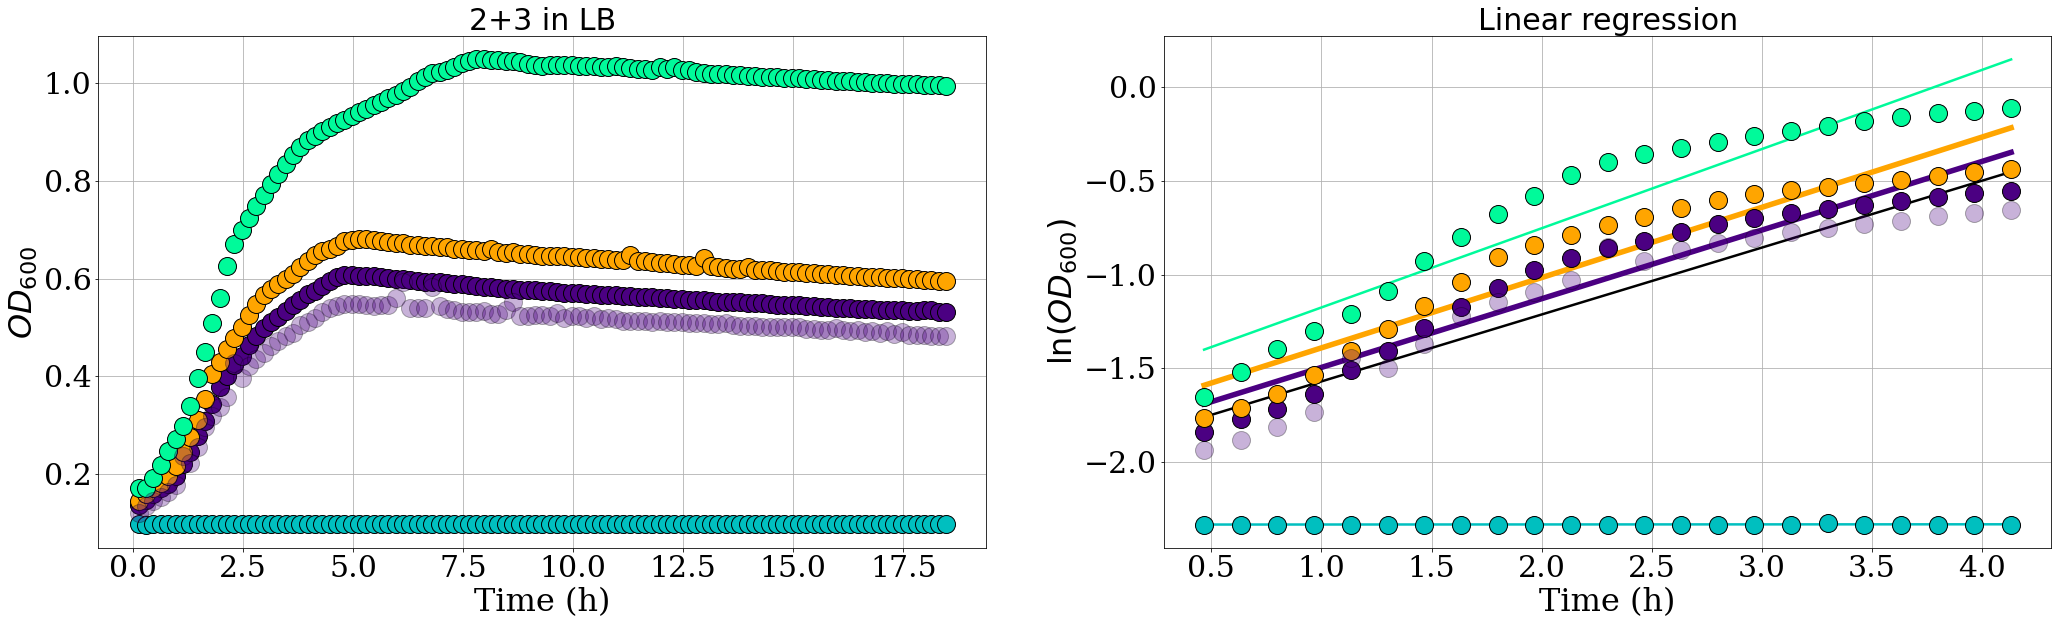

In [ ]:
#Graph for the report
x= np.arange(28, len(Plate2[:25])*10,10)
#LB
Log_data23 = pd.DataFrame()
Log_data23["Log23_A_L"] = np.log(Plate1['B2'][2:25])
Log_data23["Log23_B_L"] = np.log(Plate1['B5'][2:25])
Log_data23["Log23_C_L"] = np.log(Plate1['B7'][2:25])
Log_data23["Log23_D_L"] = np.log(Plate1['B9'][2:25])
Log_data23["Log23_E_L"] = np.log(Plate2['B2'][2:25])
popt1, pcov1 = curve_fit(func, x/60,Log_data23["Log23_A_L"], initialGuess)
popt2, pcov2 = curve_fit(func, x/60,Log_data23["Log23_B_L"], initialGuess)
popt3, pcov3 = curve_fit(func, x/60,Log_data23["Log23_C_L"], initialGuess)
popt4, pcov4 = curve_fit(func, x/60,Log_data23["Log23_D_L"], initialGuess)
popt5, pcov5 = curve_fit(func, x/60,Log_data23["Log23_E_L"], initialGuess)
S23_L = np.array([popt1[0],popt2[0],popt3[0],popt4[0],popt5[0]])

x = x= np.arange(8, len(Plate2)*10,10)
fig = plt.figure(figsize=(35,32))
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
plt.rcParams["font.family"] = "serif"
ax1 = plt.subplot(321)
ax1.plot(x/60, Plate1['B2'], ' ',color='k', marker='o', markersize=18,markerfacecolor="indigo")
ax1.plot(x/60, Plate1['B5'], ' ',color='k', marker='o', markersize=18,markerfacecolor="orange")
ax1.plot(x/60, Plate1['B7'], ' ',color='k', marker='o', markersize=18,markerfacecolor="mediumspringgreen")
ax1.plot(x/60, Plate1['B9'], ' ',color='k', marker='o', markersize=18,markerfacecolor="c")
ax1.plot(x/60, Plate2['B2'], ' ',color='k', marker='o', markersize=18,alpha=0.3, markerfacecolor="indigo")
ax1.set_ylabel(r'$OD_{600}$', family="serif",fontsize = 32)
ax1.set_xlabel(r'Time (h)', family="serif",fontsize = 32)
ax1.set_title('2+3 in LB', fontsize = 30, family = 'sarif')
ax1.grid()

x= np.arange(28, len(Plate2[:25])*10,10)
ax2 = plt.subplot(322)
ax2.plot(x/60, func(x/60, *popt1), color='indigo',lw=5.5)
ax2.plot(x/60, func(x/60, *popt2), color='orange',lw=5.5)
ax2.plot(x/60, func(x/60, *popt3), color='mediumspringgreen',lw=2.5)
ax2.plot(x/60, func(x/60, *popt4), color='c',lw=2.5)
ax2.plot(x/60, func(x/60, *popt5), color='k',lw=2.5)
ax2.plot(x/60, Log_data23["Log23_A_L"], ' ',color='k', marker='o', markersize=18,alpha=1,markerfacecolor="indigo")
ax2.plot(x/60, Log_data23["Log23_B_L"], ' ',color='k', marker='o', markersize=18,markerfacecolor="orange")
ax2.plot(x/60, Log_data23["Log23_C_L"], ' ',color='k', marker='o', markersize=18,markerfacecolor="mediumspringgreen")
ax2.plot(x/60, Log_data23["Log23_D_L"], ' ',color='k', marker='o', markersize=18,markerfacecolor="c")
ax2.plot(x/60, Log_data23["Log23_E_L"], ' ',color='k', marker='o', markersize=18,alpha=0.3, markerfacecolor="indigo")
ax2.set_ylabel(r'$\ln(OD_{600})$', family="serif", fontsize = 32)
ax2.set_xlabel(r'Time (h)', family="serif",fontsize = 32)
ax2.set_title('Linear regression', fontsize = 30, family = 'sarif')
ax2.grid()
#ax2.savefig(f"{images_dir}/24LB.png", bbox_inches="tight", dpi=100)


# **2+4**

In [ ]:
R_24

array([0.93087128, 0.92853702, 0.93844374])

In [ ]:
R_24 = np.array([])
#LB
Log_data24 = pd.DataFrame()
Log_data24["Log24_A_L"] = np.log(Plate1['F2'][2:25])
Log_data24["Log24_B_L"] = np.log(Plate1['C5'][2:25])
Log_data24["Log24_C_L"] = np.log(Plate1['C7'][2:25])
Log_data24["Log24_D_L"] = np.log(Plate1['B10'][2:25])
Log_data24["Log24_E_L"] = np.log(Plate2['F2'][2:25])

popt1, pcov1 = curve_fit(func, x/60,Log_data24["Log24_A_L"], initialGuess)
R_24 = np.append(R_24, r2_score(Log_data24["Log24_A_L"],func(x/60, *popt1)))

popt2, pcov2 = curve_fit(func, x/60,Log_data24["Log24_B_L"], initialGuess)
R_24 = np.append(R_24, r2_score(Log_data24["Log24_B_L"],func(x/60, *popt2)))

popt3, pcov3 = curve_fit(func, x/60,Log_data24["Log24_C_L"], initialGuess)

popt4, pcov4 = curve_fit(func, x/60,Log_data24["Log24_D_L"], initialGuess)
popt5, pcov5 = curve_fit(func, x/60,Log_data24["Log24_E_L"], initialGuess)
R_24 = np.append(R_24, r2_score(Log_data24["Log24_E_L"],func(x/60, *popt5)))

S24_L = np.array([popt1[0],popt2[0],popt3[0],popt4[0],popt5[0]])

#LB + Amp 
Log_data24["Log24_A_LA"] = np.log(Plate1['G2'][2:25])
Log_data24["Log24_B_LA"] = np.log(Plate1['E5'][2:25])
Log_data24["Log24_C_LA"] = np.log(Plate1['E7'][2:25])
Log_data24["Log24_D_LA"] = np.log(Plate1['C10'][2:25])
Log_data24["Log24_E_LA"] = np.log(Plate2['G2'][2:25])
popt1, pcov1 = curve_fit(func, x/60,Log_data24["Log24_A_LA"], initialGuess)
popt2, pcov2 = curve_fit(func, x/60,Log_data24["Log24_B_LA"], initialGuess)
popt3, pcov3 = curve_fit(func, x/60,Log_data24["Log24_C_LA"], initialGuess)
popt4, pcov4 = curve_fit(func, x/60,Log_data24["Log24_D_LA"], initialGuess)
popt5, pcov5 = curve_fit(func, x/60,Log_data24["Log24_E_LA"], initialGuess)
S24_LA = np.array([popt1[0],popt2[0],popt3[0],popt4[0],popt5[0]])

#LB + Amp + Kan 
Log_data24["Log24_A_LAK"] = np.log(Plate1['B3'][2:25])
Log_data24["Log24_B_LAK"] = np.log(Plate1['C6'][2:25])
Log_data24["Log24_C_LAK"] = np.log(Plate1['C8'][2:25])
Log_data24["Log24_D_LAK"] = np.log(Plate1['D10'][2:25])
Log_data24["Log24_E_LAK"] = np.log(Plate2['B3'][2:25])
popt1, pcov1 = curve_fit(func, x/60,Log_data24["Log24_A_LAK"], initialGuess)
popt2, pcov2 = curve_fit(func, x/60,Log_data24["Log24_B_LAK"], initialGuess)
popt3, pcov3 = curve_fit(func, x/60,Log_data24["Log24_C_LAK"], initialGuess)
popt4, pcov4 = curve_fit(func, x/60,Log_data24["Log24_D_LAK"], initialGuess)
popt5, pcov5 = curve_fit(func, x/60,Log_data24["Log24_E_LAK"], initialGuess)
S24_LAK = np.array([popt1[0],popt2[0],popt3[0],popt4[0],popt5[0]])

#LB + Amp + Kan + Ara
Log_data24["Log24_A_LAKA"] = np.log(Plate1['C3'][2:25])
Log_data24["Log24_B_LAKA"] = np.log(Plate1['E6'][2:25])
Log_data24["Log24_C_LAKA"] = np.log(Plate1['E8'][2:25])
Log_data24["Log24_D_LAKA"] = np.log(Plate1['E10'][2:25])
Log_data24["Log24_E_LAKA"] = np.log(Plate2['C3'][2:25])
S24_LAKA = np.array([popt1[0],popt2[0],popt3[0],popt4[0],popt5[0]])

S24 = pd.DataFrame(S24_L, columns=['L'])
S24['LA'] = pd.DataFrame(S24_LA)
S24['LAK'] = pd.DataFrame(S24_LAK)
S24['LAKA'] = pd.DataFrame(S24_LAKA)
S24

,L,LA,LAK,LAKA
0,0.392433,0.384120,3.696511e-01,3.696511e-01
1,0.404716,0.392564,4.094036e-01,4.094036e-01
2,-0.103671,0.014030,3.687836e-01,3.687836e-01
3,0.000544,0.000125,-2.855082e-09,-2.855082e-09
4,0.400976,0.382972,3.957926e-01,3.957926e-01


# **1+2**

In [ ]:
R_12

array([0.89645898, 0.98213725, 0.93399237, 0.96751021])

In [ ]:
R_12 =np.array([])
#LB 
Log_data12 = pd.DataFrame()
Log_data12["Log12_A_L"] = np.log(Plate1['B4'][2:25])
Log_data12["Log12_B_L"] = np.log(Plate2['B4'][2:25])
Log_data12["Log12_C_L"] = np.log(Plate2['B6'][2:25])
Log_data12["Log12_D_L"] = np.log(Plate2['B9'][2:25])
Log_data12["Log12_E_L"] = np.log(Plate2['B10'][2:25])
popt1, pcov1 = curve_fit(func, x/60,Log_data12["Log12_A_L"], initialGuess)
R_12 = np.append(R_12, r2_score(Log_data12["Log12_A_L"],func(x/60, *popt1)))

popt2, pcov2 = curve_fit(func, x/60,Log_data12["Log12_B_L"], initialGuess)
R_12 = np.append(R_12, r2_score(Log_data12["Log12_B_L"],func(x/60, *popt2)))

popt3, pcov3 = curve_fit(func, x/60,Log_data12["Log12_C_L"], initialGuess)
R_12 = np.append(R_12, r2_score(Log_data12["Log12_C_L"],func(x/60, *popt3)))

popt4, pcov4 = curve_fit(func, x/60,Log_data12["Log12_D_L"], initialGuess)
popt5, pcov5 = curve_fit(func, x/60,Log_data12["Log12_E_L"], initialGuess)
R_12 = np.append(R_12, r2_score(Log_data12["Log12_E_L"],func(x/60, *popt5)))

S12_L = np.array([popt1[0],popt2[0],popt3[0],popt4[0],popt5[0]])

#LB + Amp 
Log_data12["Log12_A_LA"] = np.log(Plate1['C4'][2:25])
Log_data12["Log12_B_LA"] = np.log(Plate2['C4'][2:25])
Log_data12["Log12_C_LA"] = np.log(Plate2['C6'][2:25])
Log_data12["Log12_D_LA"] = np.log(Plate2['C9'][2:25])
Log_data12["Log12_E_LA"] = np.log(Plate2['C10'][2:25])
popt1, pcov1 = curve_fit(func, x/60,Log_data12["Log12_A_LA"], initialGuess)
popt2, pcov2 = curve_fit(func, x/60,Log_data12["Log12_B_LA"], initialGuess)
popt3, pcov3 = curve_fit(func, x/60,Log_data12["Log12_C_LA"], initialGuess)
popt4, pcov4 = curve_fit(func, x/60,Log_data12["Log12_D_LA"], initialGuess)
popt5, pcov5 = curve_fit(func, x/60,Log_data12["Log12_E_LA"], initialGuess)
S12_LA = np.array([popt1[0],popt2[0],popt3[0],popt4[0],popt5[0]])


#LB + Amp + Kan 
Log_data12["Log12_A_LAK"] = np.log(Plate1['D4'][2:25])
Log_data12["Log12_B_LAK"] = np.log(Plate2['D4'][2:25])
Log_data12["Log12_C_LAK"] = np.log(Plate2['D6'][2:25])
Log_data12["Log12_D_LAK"] = np.log(Plate2['D9'][2:25])
Log_data12["Log12_E_LAK"] = np.log(Plate2['D10'][2:25])
popt1, pcov1 = curve_fit(func, x/60,Log_data12["Log12_A_LAK"], initialGuess)
popt2, pcov2 = curve_fit(func, x/60,Log_data12["Log12_B_LAK"], initialGuess)
popt3, pcov3 = curve_fit(func, x/60,Log_data12["Log12_C_LAK"], initialGuess)
popt4, pcov4 = curve_fit(func, x/60,Log_data12["Log12_D_LAK"], initialGuess)
popt5, pcov5 = curve_fit(func, x/60,Log_data12["Log12_E_LAK"], initialGuess)
S12_LAK = np.array([popt1[0],popt2[0],popt3[0],popt4[0],popt5[0]])


#LB + Amp + Kan + Ara
Log_data12["Log12_A_LAKA"] = np.log(Plate1['E4'][2:25])
Log_data12["Log12_B_LAKA"] = np.log(Plate2['E4'][2:25])
Log_data12["Log12_C_LAKA"] = np.log(Plate2['E6'][2:25])
Log_data12["Log12_D_LAKA"] = np.log(Plate2['E9'][2:25])
Log_data12["Log12_E_LAKA"] = np.log(Plate2['E10'][2:25])
popt1, pcov1 = curve_fit(func, x/60,Log_data12["Log12_A_LAKA"], initialGuess)
popt2, pcov2 = curve_fit(func, x/60,Log_data12["Log12_B_LAKA"], initialGuess)
popt3, pcov3 = curve_fit(func, x/60,Log_data12["Log12_C_LAKA"], initialGuess)
popt4, pcov4 = curve_fit(func, x/60,Log_data12["Log12_D_LAKA"], initialGuess)
popt5, pcov5 = curve_fit(func, x/60,Log_data12["Log12_E_LAKA"], initialGuess)
S12_LAKA = np.array([popt1[0],popt2[0],popt3[0],popt4[0],popt5[0]])


S12 = pd.DataFrame(S12_L, columns=['L'])
S12['LA'] = pd.DataFrame(S12_LA)
S12['LAK'] = pd.DataFrame(S12_LAK)
S12['LAKA'] = pd.DataFrame(S12_LAKA)
S12

,L,LA,LAK,LAKA
0,0.354283,3.285797e-01,0.339213,4.041248e-01
1,0.487650,4.911111e-01,0.481410,4.941039e-01
2,0.409664,4.260311e-01,0.454578,4.648002e-01
3,0.000328,-2.727235e-09,-0.000603,-2.727235e-09
4,0.430440,4.704758e-01,0.037744,1.585485e-03


# **WT**

In [ ]:
R_WT

array([0.90132901, 0.91906745, 0.94508113, 0.92883932])

In [ ]:
R_WT = np.array([])
#LB 
Log_dataWT = pd.DataFrame()
Log_dataWT["LogWT_A_L"] = np.log(Plate1['D3'][2:25])
Log_dataWT["LogWT_B_L"] = np.log(Plate1['B11'][2:25])
Log_dataWT["LogWT_C_L"] = np.log(Plate2['D3'][2:25])
Log_dataWT["LogWT_D_L"] = np.log(Plate2['B5'][2:25])
Log_dataWT["LogWT_E_L"] = np.log(Plate2['B7'][2:25])

popt1, pcov1 = curve_fit(func, x/60,Log_dataWT["LogWT_A_L"], initialGuess)
R_WT = np.append(R_WT, r2_score(Log_dataWT["LogWT_A_L"],func(x/60, *popt1)))

popt2, pcov2 = curve_fit(func, x/60,Log_dataWT["LogWT_B_L"], initialGuess)
popt3, pcov3 = curve_fit(func, x/60,Log_dataWT["LogWT_C_L"], initialGuess)
R_WT = np.append(R_WT, r2_score(Log_dataWT["LogWT_C_L"],func(x/60, *popt3)))

popt4, pcov4 = curve_fit(func, x/60,Log_dataWT["LogWT_D_L"], initialGuess)
R_WT = np.append(R_WT, r2_score(Log_dataWT["LogWT_D_L"],func(x/60, *popt4)))

popt5, pcov5 = curve_fit(func, x/60,Log_dataWT["LogWT_E_L"], initialGuess)
R_WT = np.append(R_WT, r2_score(Log_dataWT["LogWT_E_L"],func(x/60, *popt5)))
SWT_L = np.array([popt1[0],popt2[0],popt3[0],popt4[0],popt5[0]])

#LB + Amp 
Log_dataWT["LogWT_A_LA"] = np.log(Plate1['E3'][2:25])
Log_dataWT["LogWT_B_LA"] = np.log(Plate1['C11'][2:25])
Log_dataWT["LogWT_C_LA"] = np.log(Plate2['E3'][2:25])
Log_dataWT["LogWT_D_LA"] = np.log(Plate2['C5'][2:25])
Log_dataWT["LogWT_E_LA"] = np.log(Plate2['C7'][2:25])
popt1, pcov1 = curve_fit(func, x/60,Log_dataWT["LogWT_A_LA"], initialGuess)
popt2, pcov2 = curve_fit(func, x/60,Log_dataWT["LogWT_B_LA"], initialGuess)
popt3, pcov3 = curve_fit(func, x/60,Log_dataWT["LogWT_C_LA"], initialGuess)
popt4, pcov4 = curve_fit(func, x/60,Log_dataWT["LogWT_D_LA"], initialGuess)
popt5, pcov5 = curve_fit(func, x/60,Log_dataWT["LogWT_E_LA"], initialGuess)
SWT_LA = np.array([popt1[0],popt2[0],popt3[0],popt4[0],popt5[0]])

#LB + Amp + Kan 
Log_dataWT["LogWT_A_LAK"] = np.log(Plate1['F3'][2:25])
Log_dataWT["LogWT_B_LAK"] = np.log(Plate1['D11'][2:25])
Log_dataWT["LogWT_C_LAK"] = np.log(Plate2['F3'][2:25])
Log_dataWT["LogWT_D_LAK"] = np.log(Plate2['D5'][2:25])
Log_dataWT["LogWT_E_LAK"] = np.log(Plate2['D7'][2:25])
popt1, pcov1 = curve_fit(func, x/60,Log_dataWT["LogWT_A_LAK"], initialGuess)
popt2, pcov2 = curve_fit(func, x/60,Log_dataWT["LogWT_B_LAK"], initialGuess)
popt3, pcov3 = curve_fit(func, x/60,Log_dataWT["LogWT_C_LAK"], initialGuess)
popt4, pcov4 = curve_fit(func, x/60,Log_dataWT["LogWT_D_LAK"], initialGuess)
popt5, pcov5 = curve_fit(func, x/60,Log_dataWT["LogWT_E_LAK"], initialGuess)
SWT_LAK = np.array([popt1[0],popt2[0],popt3[0],popt4[0],popt5[0]])

#LB + Amp + Kan + Ara
Log_dataWT["LogWT_A_LAKA"] = np.log(Plate1['G3'][2:25])
Log_dataWT["LogWT_B_LAKA"] = np.log(Plate1['E11'][2:25])
Log_dataWT["LogWT_C_LAKA"] = np.log(Plate2['G3'][2:25])
Log_dataWT["LogWT_D_LAKA"] = np.log(Plate2['E5'][2:25])
Log_dataWT["LogWT_E_LAKA"] = np.log(Plate2['E7'][2:25])
popt1, pcov1 = curve_fit(func, x/60,Log_dataWT["LogWT_A_LAKA"], initialGuess)
popt2, pcov2 = curve_fit(func, x/60,Log_dataWT["LogWT_B_LAKA"], initialGuess)
popt3, pcov3 = curve_fit(func, x/60,Log_dataWT["LogWT_C_LAKA"], initialGuess)
popt4, pcov4 = curve_fit(func, x/60,Log_dataWT["LogWT_D_LAKA"], initialGuess)
popt5, pcov5 = curve_fit(func, x/60,Log_dataWT["LogWT_E_LAKA"], initialGuess)
SWT_LAKA = np.array([popt1[0],popt2[0],popt3[0],popt4[0],popt5[0]])

SWT = pd.DataFrame(SWT_L, columns=['L'])
SWT['LA'] = pd.DataFrame(SWT_LA)
SWT['LAK'] = pd.DataFrame(SWT_LAK)
SWT['LAKA'] = pd.DataFrame(SWT_LAKA)

In [ ]:
print('Strain 1+2')
print(S12)
S12.to_excel("/content/drive/MyDrive/Master/GenomeEngineering/S12.xlsx") 
print('\nStrain 2+3')
print(S23)
S23.to_excel("/content/drive/MyDrive/Master/GenomeEngineering/S23.xlsx") 
print('\nStrain 2+4')
print(S24)
S24.to_excel("/content/drive/MyDrive/Master/GenomeEngineering/S24.xlsx") 
print('\nStrain WT')
print(SWT)
SWT.to_excel("/content/drive/MyDrive/Master/GenomeEngineering/SWT.xlsx") 

Strain 1+2
          L            LA       LAK          LAKA
0  0.354283  3.285797e-01  0.339213  4.041248e-01
1  0.487650  4.911111e-01  0.481410  4.941039e-01
2  0.409664  4.260311e-01  0.454578  4.648002e-01
3  0.000328 -2.727235e-09 -0.000603 -2.727235e-09
4  0.430440  4.704758e-01  0.037744  1.585485e-03

Strain 2+3
          L        LA       LAK      LAKA
0  0.366199  0.391669 -0.003668  0.000582
1  0.374714  0.383309 -0.002289 -0.004980
2  0.422303 -0.004909  0.235894  0.355836
3  0.000365  0.000791  0.000369  0.000310
4  0.356784  0.354543 -0.006489 -0.009985

Strain 2+4
          L        LA           LAK          LAKA
0  0.392433  0.384120  3.696511e-01  3.696511e-01
1  0.404716  0.392564  4.094036e-01  4.094036e-01
2 -0.103671  0.014030  3.687836e-01  3.687836e-01
3  0.000544  0.000125 -2.855082e-09 -2.855082e-09
4  0.400976  0.382972  3.957926e-01  3.957926e-01

Strain WT
          L        LA           LAK          LAKA
0  0.350044 -0.014934 -1.082268e-03 -3.474256e-03
1 

In [ ]:
from scipy.stats import ttest_ind

New_12 = S12['L'].drop([3], axis =0)
New_23 = S23['L'].drop([3], axis=0)
New_24 = S24['L'].drop([2,3], axis=0)
New_WT = SWT['L'].drop([1], axis=0)

print('Statistical analysis 2+3')
print(ttest_ind(New_23, New_WT,equal_var=False))

print('\nStatistical analysis 1+2')
print(ttest_ind(New_12, New_WT,equal_var=False))

print('\nStatistical analysis 2+4')
print(ttest_ind(New_24, New_WT,equal_var=False))

print('\nStatistical analysis 2+4 and 2+3')
print(ttest_ind(New_24, New_23,equal_var=False))

print('\nMean 2+3: ' + str(New_23.mean()) + ' Std: ' + str(New_23.std()))
print('\nMean 1+2: ' + str(New_12.mean()) + ' Std: ' + str(New_12.std()))
print('\nMean 2+4: ' + str(New_24.mean()) + ' Std: ' + str(New_24.std()))
print('\nMean WT: ' + str(New_WT.mean()) + ' Std: ' + str(New_WT.std()))

print('\nMean R_12: ' + str(R_12.mean()))
print('\nMean R_23: ' + str(R_23.mean()))
print('\nMean R_24: ' + str(R_24.mean()))
print('\nMean R_WT: ' + str(R_WT.mean()))

Statistical analysis 2+3
Ttest_indResult(statistic=-0.72733640347143, pvalue=0.49568449940653814)

Statistical analysis 1+2
Ttest_indResult(statistic=0.7126032436804515, pvalue=0.5067676101884484)

Statistical analysis 2+4
Ttest_indResult(statistic=0.12948191352570756, pvalue=0.9046113536815272)

Statistical analysis 2+4 and 2+3
Ttest_indResult(statistic=1.2903779100207864, pvalue=0.2784242380269825)

Mean 2+3: 0.3799997285108062 Std: 0.029137242698960245

Mean 1+2: 0.42050933880333324 Std: 0.05510634277267875

Mean 2+4: 0.3993751087222391 Std: 0.006296136784767245

Mean WT: 0.39696906152836176 Std: 0.0364461818172027

Mean R_12: 0.9450247005418762

Mean R_23: 0.9056547606176396

Mean R_24: 0.9326173459882178

Mean R_WT: 0.9235792264718028
